In [1]:
%load_ext autoreload
%autoreload 2

import ncem

import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pickle
import pandas as pd
from scipy.stats import ttest_rel, ttest_ind
from scipy import sparse, stats

grid_search_dir = '.'
datadir = '.'

datadir = '/storage/groups/ml01/workspace/anna.schaar/tissue/data/'
grid_search_dir = '/storage/groups/ml01/workspace/anna.schaar/tissue/grid_searches_gen/'

In [2]:
sc.settings.set_figure_params(dpi=80)

In [3]:
clm = ncem.interpretation.InterpreterInteraction()
clm.load_model(
    results_path=grid_search_dir,
    gs_id="210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN",
    cv_idx=0,
    model_id='210419_interactions_max_nodes_image_1_hartmann_adam_lr1_agrFalse_predecTrue_bsS_md1_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21',
)
clm.get_data_again(data_path=datadir + "hartmann/", data_origin="hartmann")
clm.split_data_byidx_again(cv_idx=0)
clm.init_model_again()
clm.load_weights_again()

210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN: loaded 24 runs with 3-fold cross validation
cross-validation selected: cv0
loaded model 210419_interactions_max_nodes_image_1_hartmann_adam_lr1_agrFalse_predecTrue_bsS_md1_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21
Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/envs/ncem/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


collecting image-wise celldata
adding graph-level covariates


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 58/58 [00:01<00:00, 38.30it/s]


Loaded 58 images with complete data from 4 patients over 63747 cells with 36 cell features and 8 distinct celltypes.
Mean of mean node degree per images across images: 4.416036
cross-validation selected: cv0


2022-02-15 14:31:24.758214: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-15 14:31:25.312847: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1176 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0000:3b:00.0, compute capability: 7.0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌| 6351/6374 [00:36<00:00, 174.63it/s]


using ols parameters.
calculating inv fim.


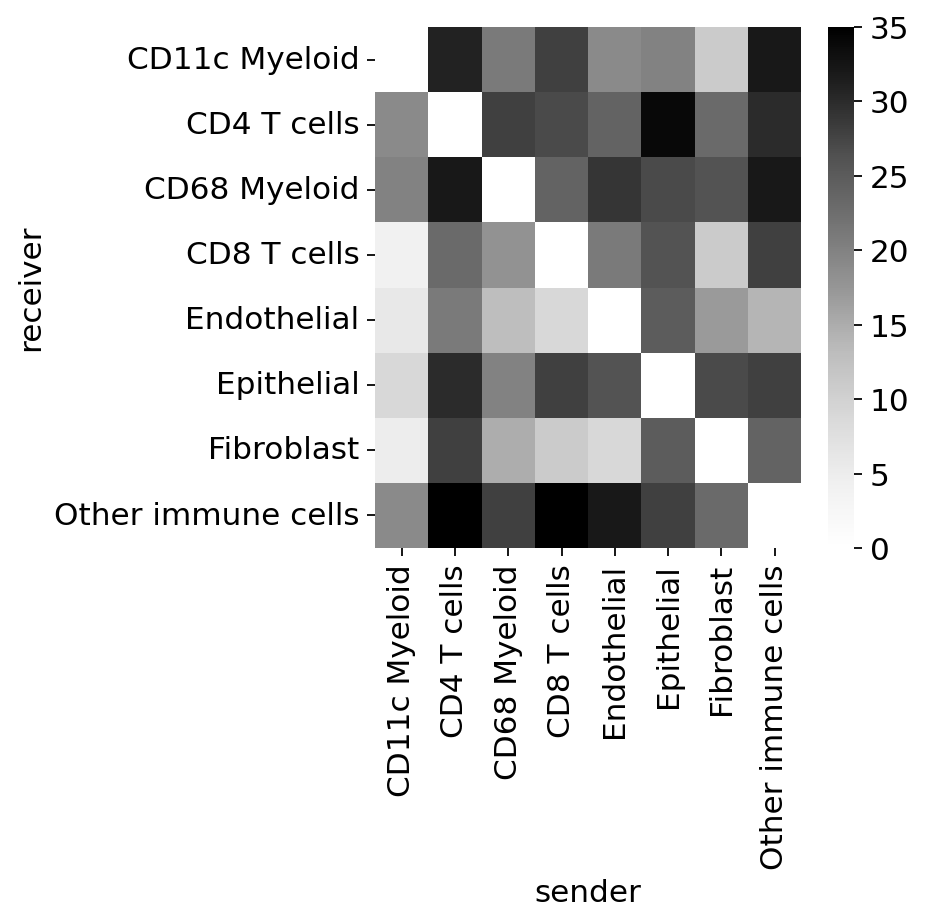

In [5]:
clm.get_sender_receiver_effects()
clm.type_coupling_analysis(figsize=(6,6))